<a href="https://colab.research.google.com/github/Vaddisaimanikanta/POWER-BI-PROJECTS/blob/main/Amazon_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

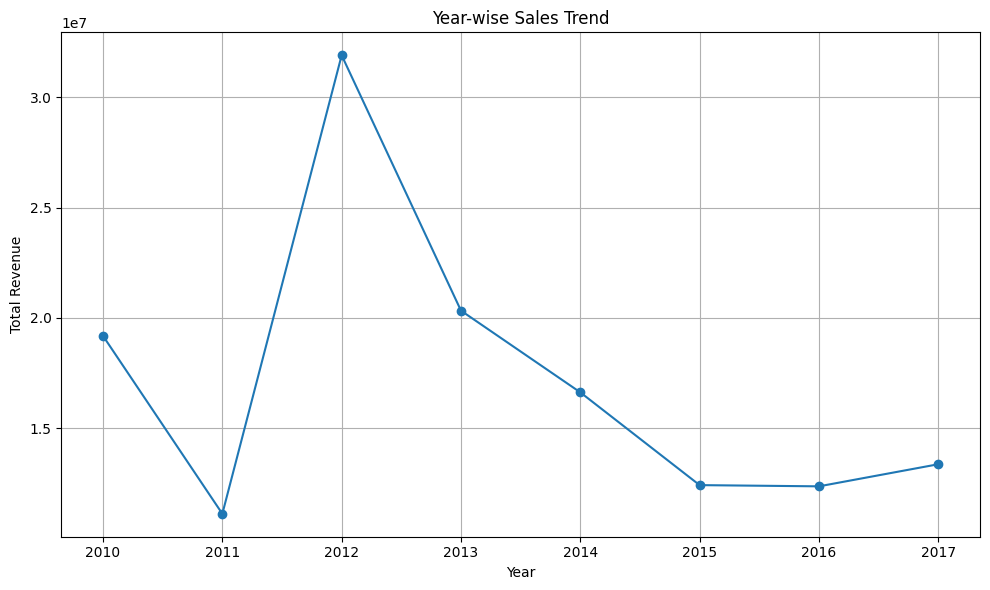

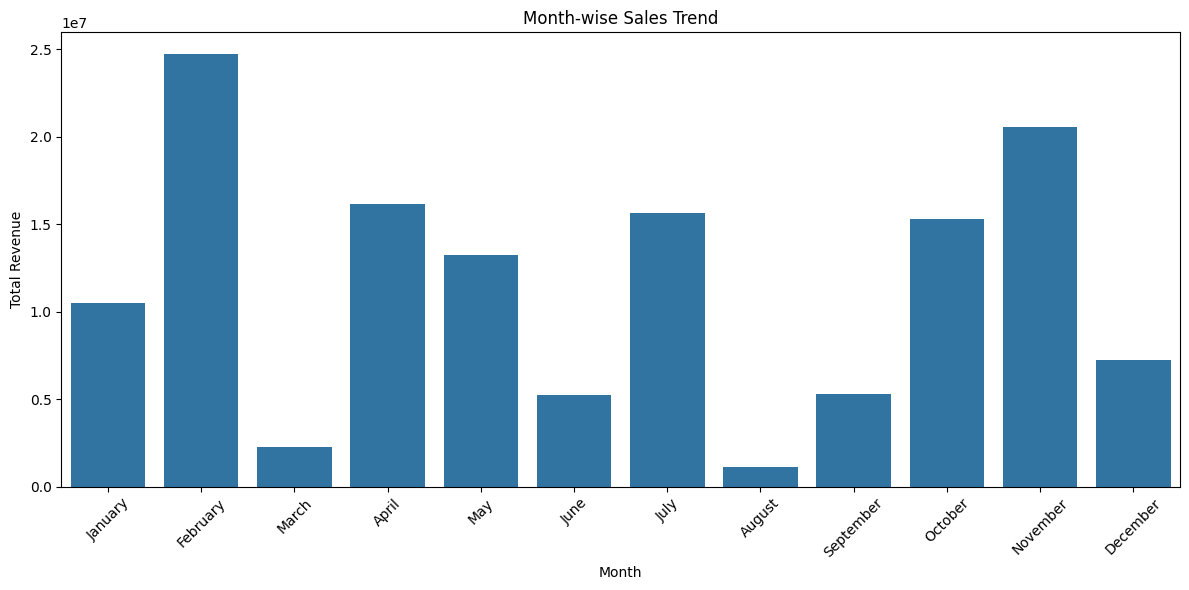

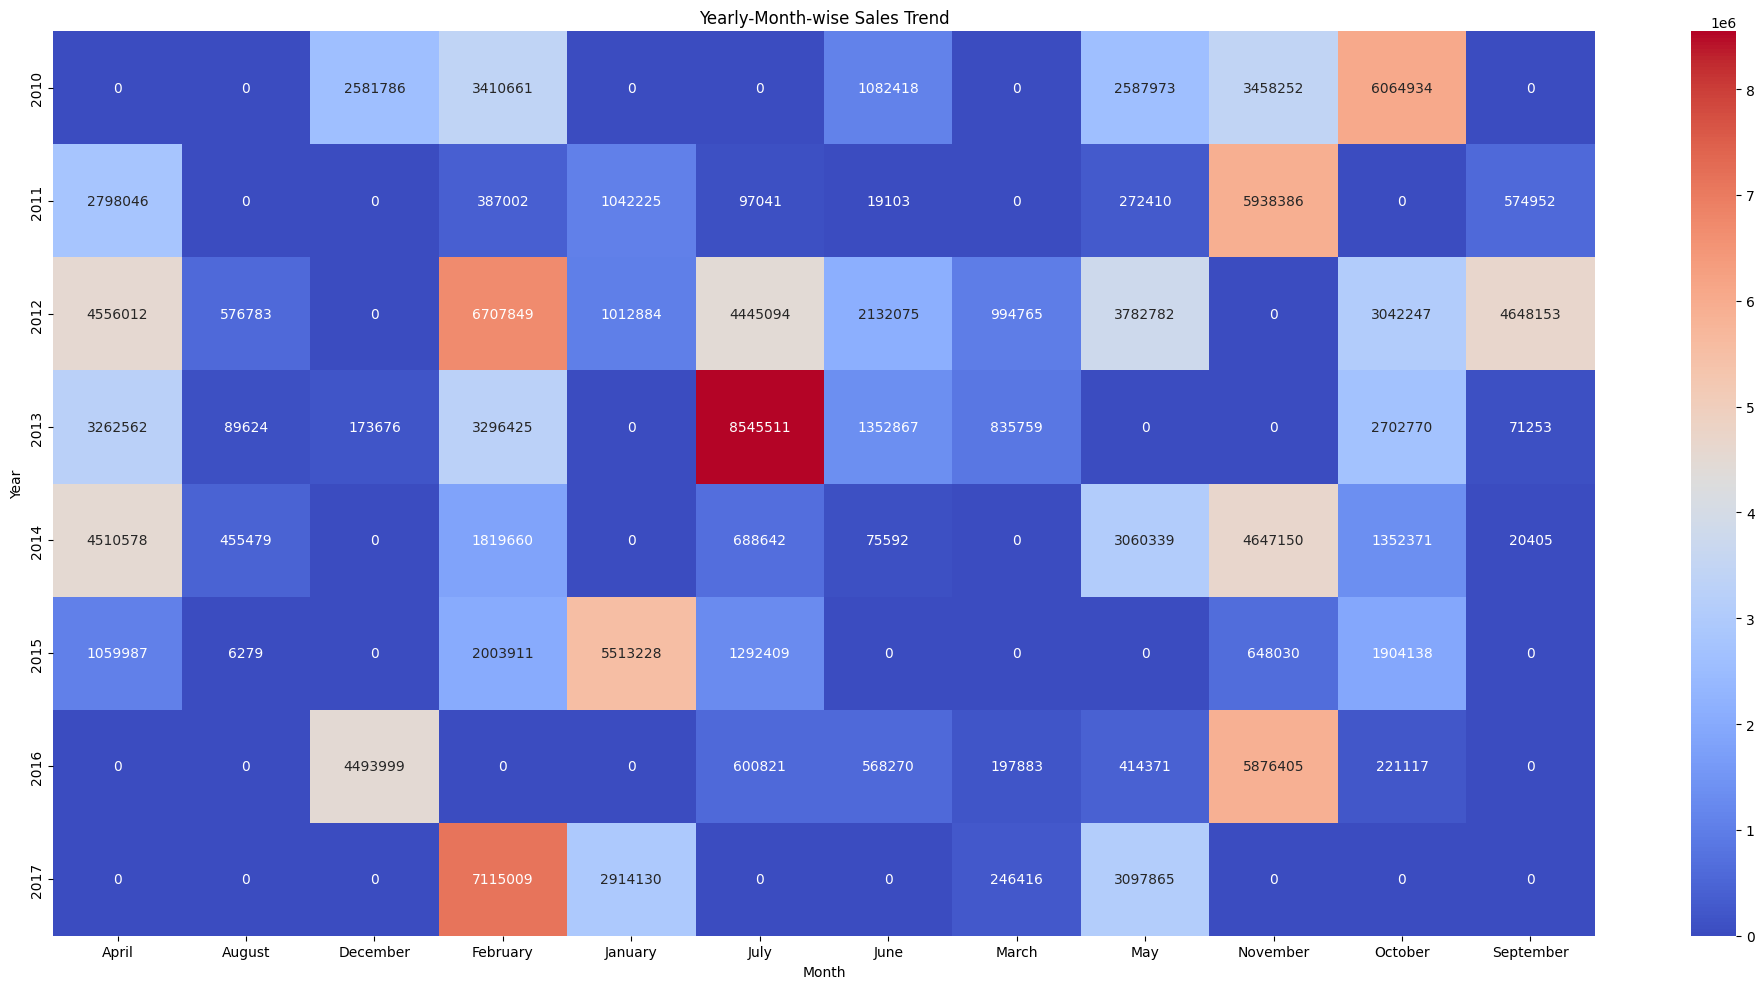

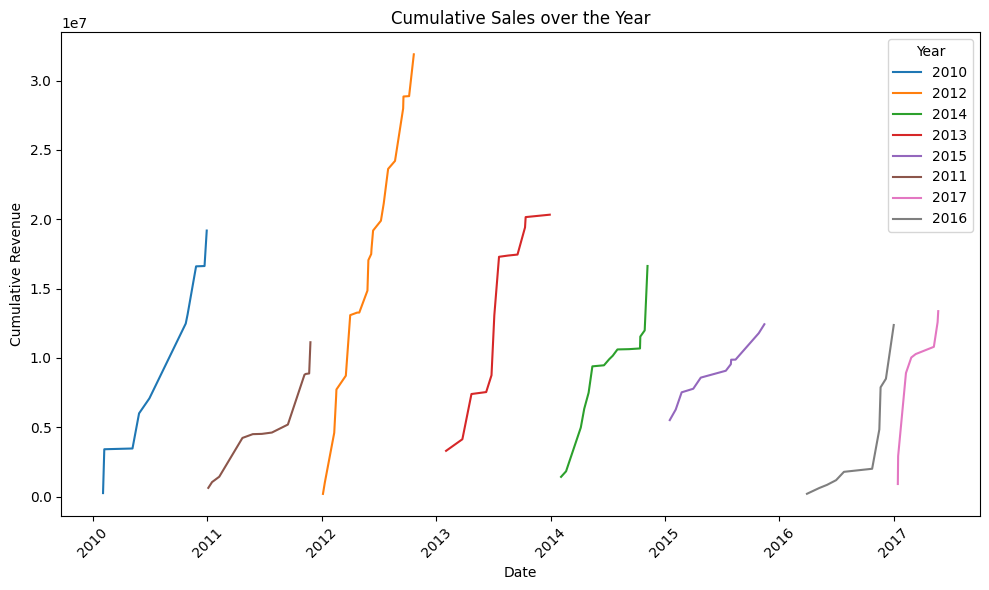

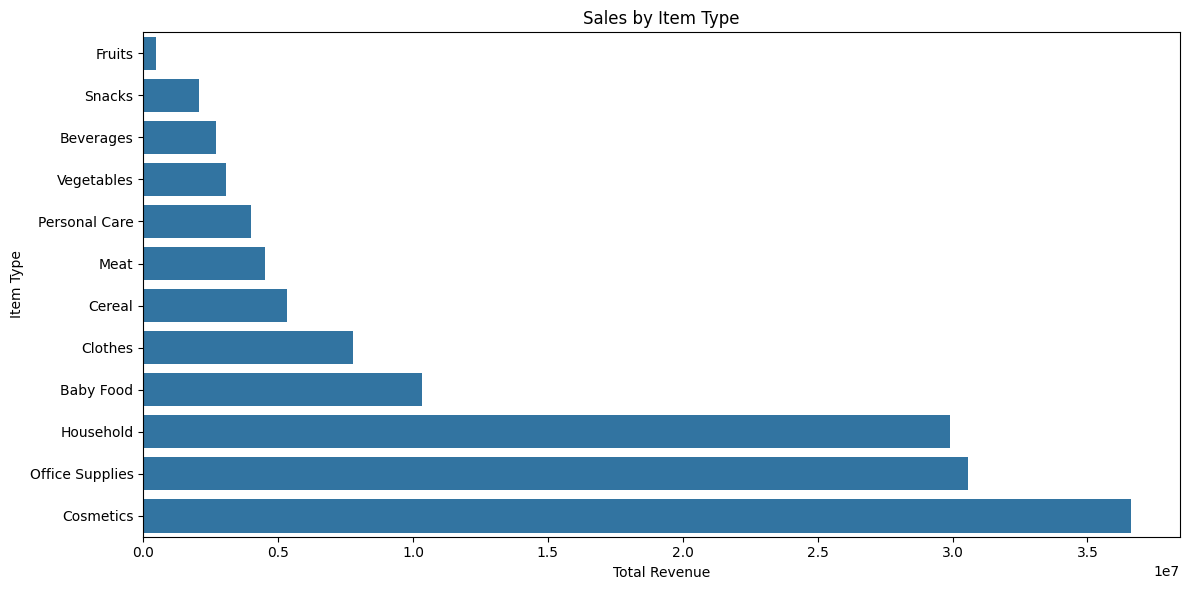

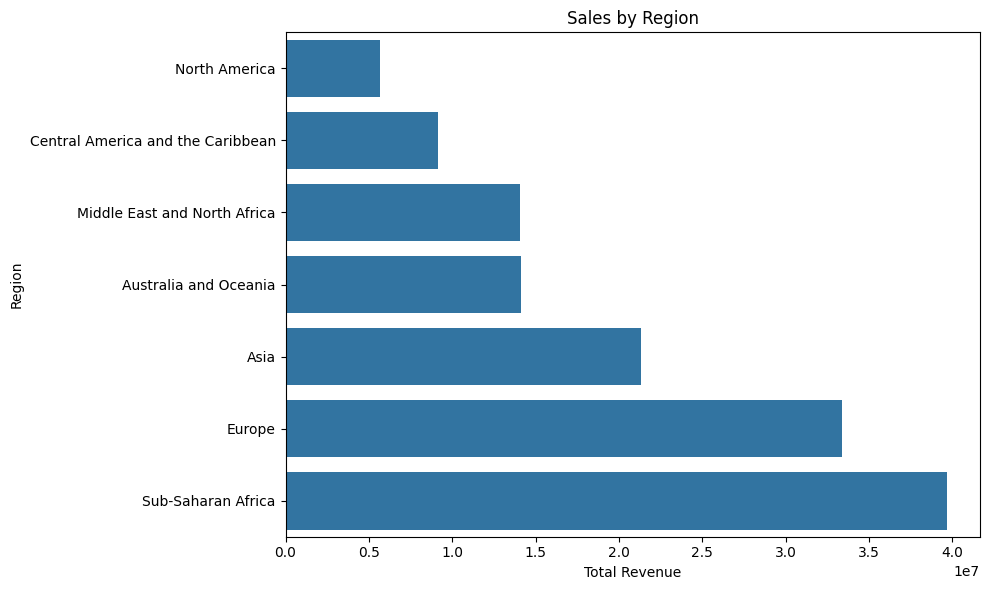

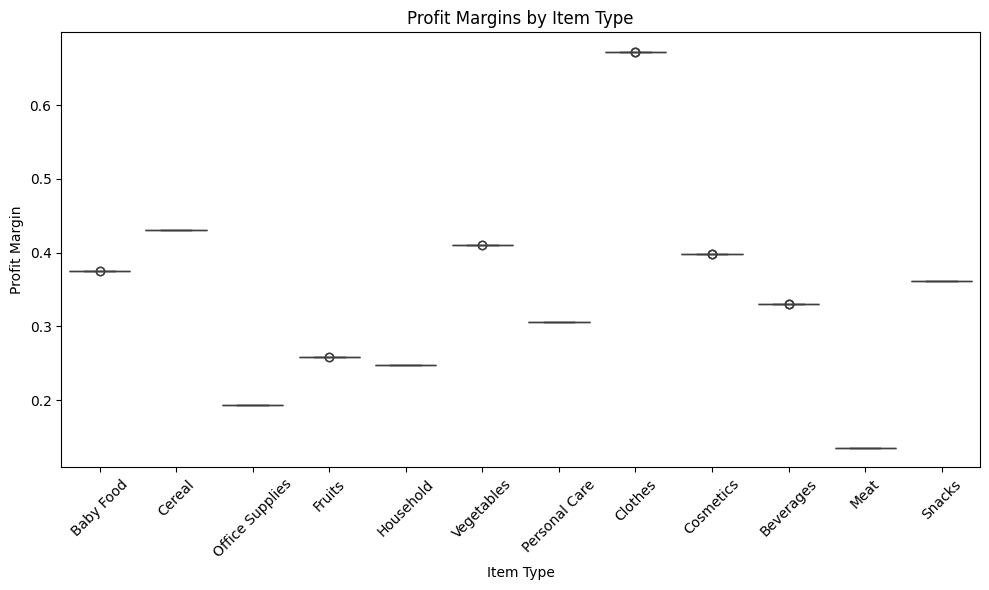

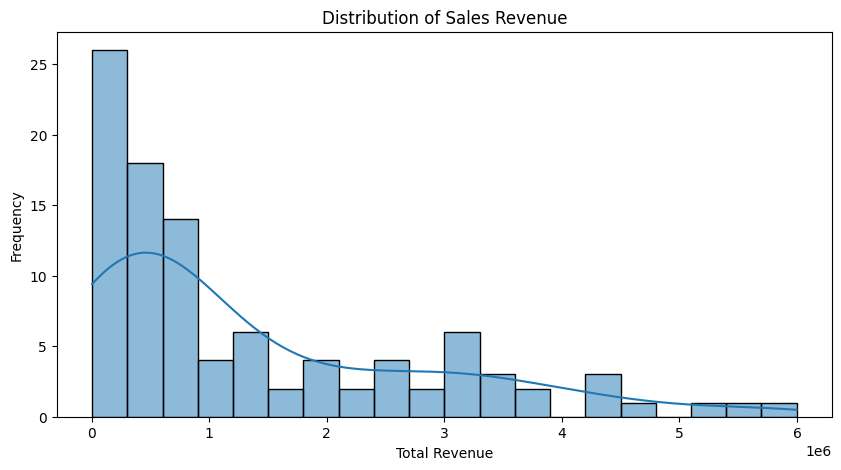

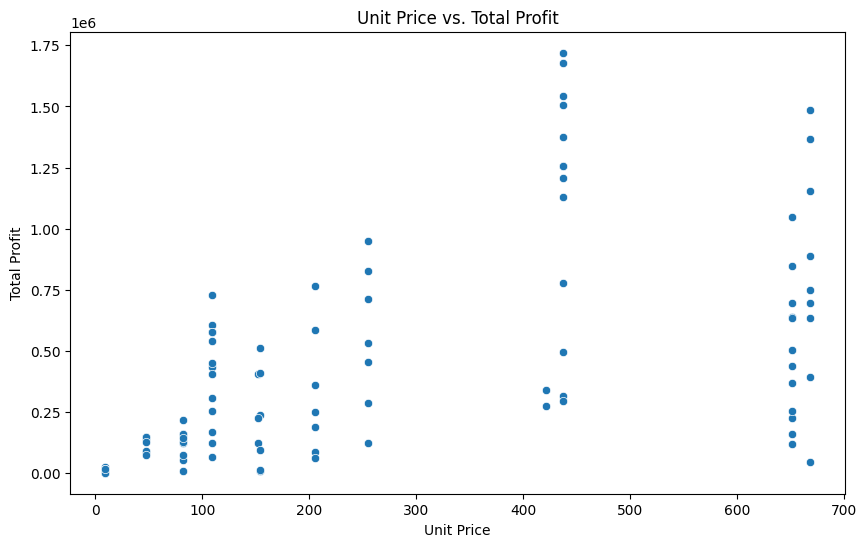

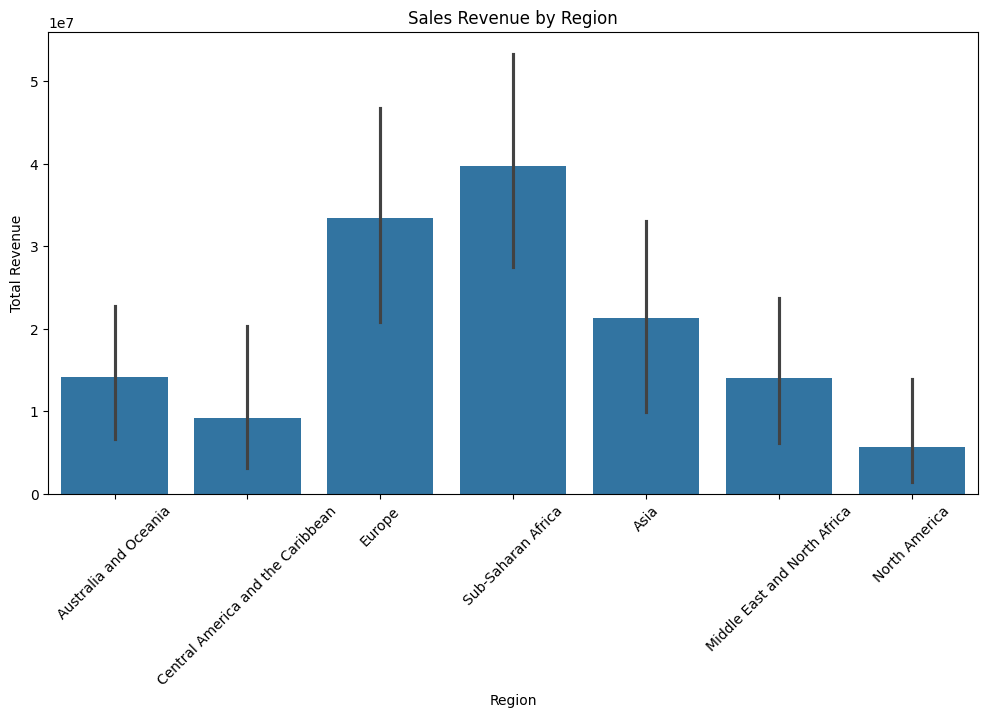

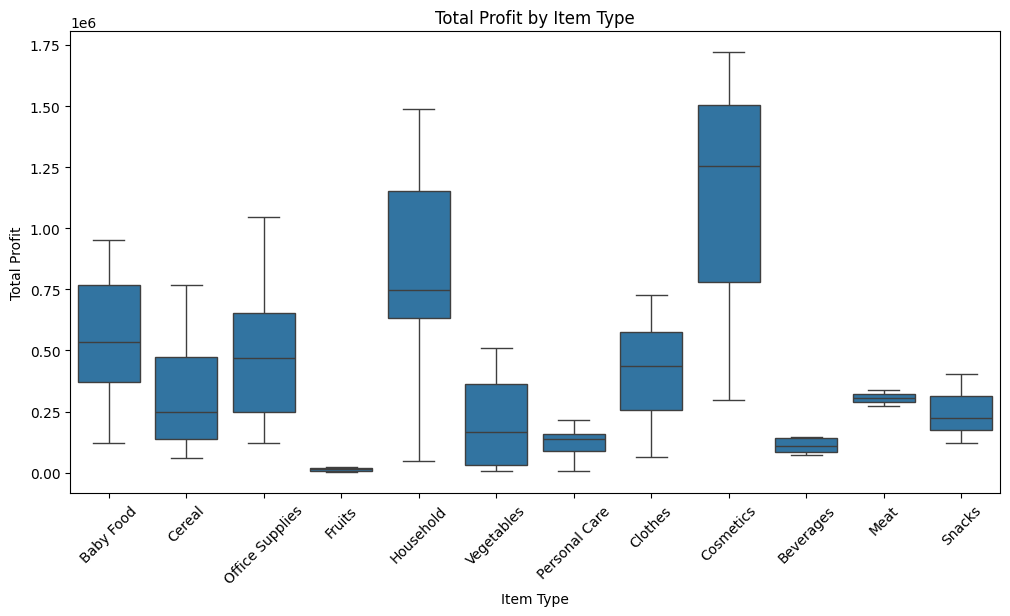

<ipython-input-11-525067bc1c8d>:141: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


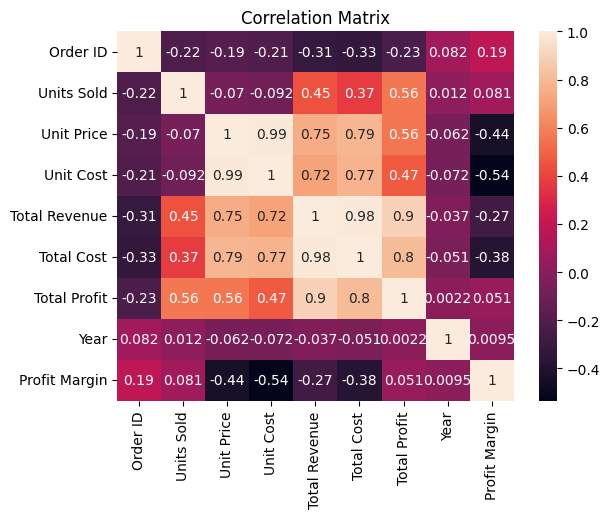

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

def load_data(filepath):
    """Loads data from a CSV file and performs basic cleaning."""
    data = pd.read_csv(filepath)
    # Convert 'order date' to datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    # Extract year and month for trend analysis
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month_name()
    return data

def calculate_trends(data):
    """Calculates month-wise, year-wise, and yearly-month-wise sales trends."""
    monthly_sales = data.groupby('Month')['Total Revenue'].sum()
    yearly_sales = data.groupby('Year')['Total Revenue'].sum()
    yearly_monthly_sales = data.pivot_table(
        index='Year', columns='Month', values='Total Revenue', aggfunc='sum'
    )
    return monthly_sales, yearly_sales, yearly_monthly_sales

def visualize_trends(monthly_sales, yearly_sales, yearly_monthly_sales,data):
    """Visualizes sales trends and additional insights."""
    # Ensure month order in month-wise visualizations
    ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                      'July', 'August', 'September', 'October', 'November', 'December']

    # Year-wise sales trend
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
    plt.title('Year-wise Sales Trend')
    plt.xlabel('Year')
    plt.ylabel('Total Revenue')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Month-wise sales trend
    plt.figure(figsize=(12, 6))
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values, order=ordered_months)
    plt.title('Month-wise Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Yearly-month-wise sales
    plt.figure(figsize=(20, 10))
    sns.heatmap(yearly_monthly_sales.fillna(0), annot=True, cmap='coolwarm', fmt=".0f")
    plt.title("Yearly-Month-wise Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    for year in data['Year'].unique():
        df_year = data[data['Year'] == year]
        df_year = df_year.sort_values(by='Order Date')
        df_year['Cumulative Revenue'] = df_year['Total Revenue'].cumsum()
        sns.lineplot(x='Order Date', y='Cumulative Revenue', data=df_year, label=year)
    plt.title('Cumulative Sales over the Year')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Revenue')
    plt.legend(title='Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Sales by Item Type
    plt.figure(figsize=(12, 6))
    item_type_sales = data.groupby('Item Type')['Total Revenue'].sum().sort_values()
    sns.barplot(x=item_type_sales.values, y=item_type_sales.index)
    plt.title('Sales by Item Type')
    plt.xlabel('Total Revenue')
    plt.ylabel('Item Type')
    plt.tight_layout()
    plt.show()

    # Sales by Region
    plt.figure(figsize=(10, 6))
    region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values()
    sns.barplot(x=region_sales.values, y=region_sales.index)
    plt.title('Sales by Region')
    plt.xlabel('Total Revenue')
    plt.ylabel('Region')
    plt.tight_layout()
    plt.show()

    # Profit Margins
    data['Profit Margin'] = data['Total Profit'] / data['Total Revenue']
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Item Type', y='Profit Margin', data=data)
    plt.title('Profit Margins by Item Type')
    plt.xlabel('Item Type')
    plt.ylabel('Profit Margin')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Distribution of Sales Revenue
    plt.figure(figsize=(10, 5))
    sns.histplot(data['Total Revenue'], bins=20, kde=True)
    plt.title('Distribution of Sales Revenue')
    plt.xlabel('Total Revenue')
    plt.ylabel('Frequency')
    plt.show()

    # Relationship between Unit Price and Total Profit
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Unit Price', y='Total Profit', data=data)
    plt.title('Unit Price vs. Total Profit')
    plt.xlabel('Unit Price')
    plt.ylabel('Total Profit')
    plt.show()

    # Sales Revenue by Region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Region', y='Total Revenue', data=data, estimator=sum)
    plt.title('Sales Revenue by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

    # Total Profit Distribution by Item Type
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Item Type', y='Total Profit', data=data)
    plt.title('Total Profit by Item Type')
    plt.xlabel('Item Type')
    plt.ylabel('Total Profit')
    plt.xticks(rotation=45)
    plt.show()

def analyze_relationships(data):
    """Analyzes correlations among attributes with a heatmap."""
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title("Correlation Matrix")
    plt.show()

def main():
    # Adjust the file path as necessary
    data = load_data('/content/Amazon Sales data.csv')
    monthly_sales, yearly_sales, yearly_monthly_sales = calculate_trends(data)
    visualize_trends(monthly_sales, yearly_sales, yearly_monthly_sales,data)
    analyze_relationships(data)

if __name__ == "__main__":
    main()
